In [31]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [32]:
import yfinance as yf
import matplotlib.pyplot as plt
tesla_data = yf.Ticker("TSLA").history(period="max")

tesla_data.reset_index(inplace=True)

print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [33]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" 
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find_all("table")[1]  
tesla_revenue = pd.read_html(str(table))[0] 

tesla_revenue.columns = ["Date", "Revenue"] 
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace("[$,]", "", regex=True).astype(float)  
tesla_revenue.dropna(inplace=True)  

print(tesla_revenue.tail())


          Date  Revenue
56  2010-09-30     31.0
57  2010-06-30     28.0
58  2010-03-31     21.0
60  2009-09-30     46.0
61  2009-06-30     27.0


C:\Users\Nehad\AppData\Local\Temp\ipykernel_3356\1360375205.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table))[0]


In [37]:
gme_data = yf.Ticker("GME").history(period="max")

gme_data.reset_index(inplace=True)

print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [34]:
from selenium import webdriver

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

driver = webdriver.Chrome()

driver.get(url)

driver.implicitly_wait(10)  

html = driver.page_source

from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

table = soup.find("table")

data = pd.read_html(str(table))[0]

gme_revenue = data
print(gme_revenue.tail())

driver.quit()


C:\Users\Nehad\AppData\Local\Temp\ipykernel_3356\2656236323.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_html(str(table))[0]


    GameStop Annual Revenue (Millions of US $)  \
11                                        2013   
12                                        2012   
13                                        2011   
14                                        2010   
15                                        2009   

   GameStop Annual Revenue (Millions of US $).1  
11                                       $8,887  
12                                       $9,551  
13                                       $9,474  
14                                       $9,078  
15                                       $8,806  


[*********************100%***********************]  1 of 1 completed


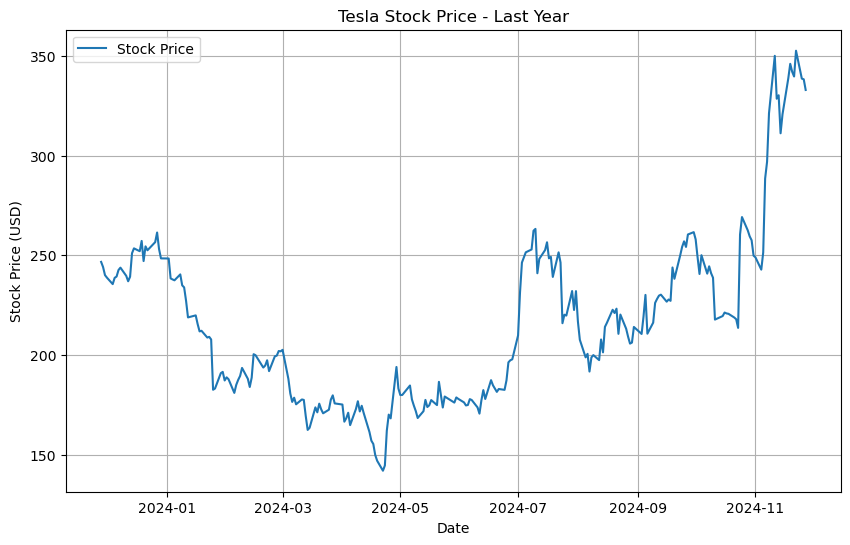

In [35]:
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Stock Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

tesla_data = yf.download('TSLA', period='1y')

make_graph(tesla_data['Close'], 'Tesla Stock Price - Last Year')

[*********************100%***********************]  1 of 1 completed


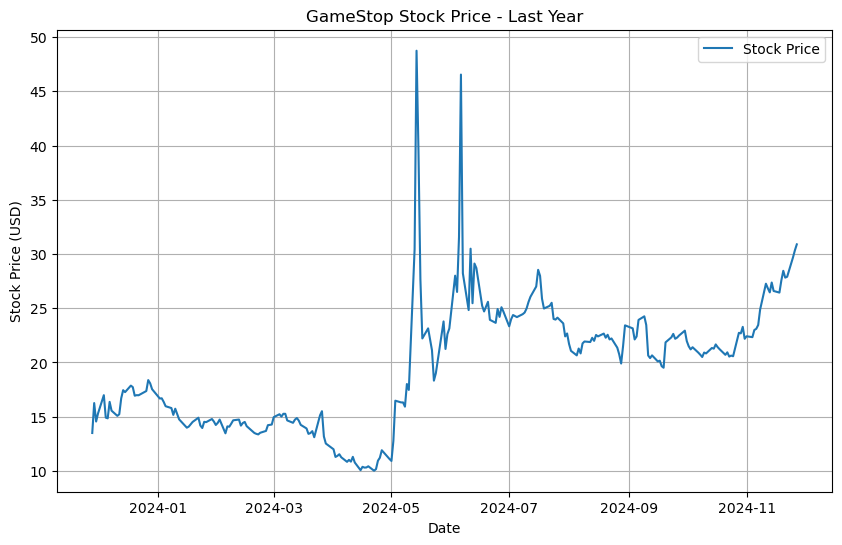

In [36]:
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Stock Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

gamestop_data = yf.download('GME', period='1y')

make_graph(gamestop_data['Close'], 'GameStop Stock Price - Last Year')